In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
# importing the cleaned dataset
imploded_df = pd.read_csv('../data/processed/cleaned_data_imploded.csv')

In [3]:
# one hot encoding
unique_genres = set()
for genres in imploded_df['track_genre'].str.split(','):
    unique_genres.update(genres)

for genre in unique_genres:
    encoded_genre = genre.replace(' ', '_')
    encoded_genre = ''.join(e for e in encoded_genre if e.isalnum() or e == '_')
    imploded_df[encoded_genre] = imploded_df['track_genre'].str.contains(genre).astype(int)

imploded_df.drop(columns=['track_genre'], inplace=True)

In [4]:
imploded_df

,track_id,popularity,duration_s,explicit,danceability,energy,key,loudness,mode,speechiness,...,edm,hardrock,showtunes,minimaltechno,punk,disney,guitar,gospel,house,jazz
0,0000vdREvCVMxbQTkS888c,44,160.725,1,0.910,0.37400,8,-9.844,0,0.1990,...,0,0,0,0,0,0,0,0,0,0
1,000CC8EParg64OmTxVnZ0p,47,322.933,0,0.269,0.51600,0,-7.361,1,0.0366,...,0,0,0,0,0,0,0,0,0,0
2,000Iz0K615UepwSJ5z2RE5,22,515.360,0,0.686,0.56000,5,-13.264,0,0.0462,...,0,0,0,1,0,0,0,0,0,0
3,000RDCYioLteXcutOjeweY,62,190.203,0,0.679,0.77000,0,-3.537,1,0.1900,...,0,0,0,0,0,0,0,0,0,0
4,000qpdoc97IMTBvF8gwcpy,19,331.240,0,0.519,0.43100,6,-13.606,0,0.0291,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88890,7zxHiMmVLt4LGWpOMqOpUh,56,325.156,0,0.766,0.38200,7,-11.464,0,0.0324,...,0,0,0,0,0,0,0,0,0,0
88891,7zxpdh3EqMq2JCkOI0EqcG,23,109.573,0,0.529,0.00879,10,-32.266,1,0.0587,...,0,0,0,0,0,1,0,0,0,0
88892,7zyYmIdjqqiX6kLryb7QBx,61,260.573,0,0.423,0.36000,3,-9.458,1,0.0372,...,0,0,0,0,0,0,0,0,0,0
88893,7zybSU9tFO9HNlwmGF7stc,54,234.300,0,0.649,0.83400,10,-11.430,0,0.0397,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# split train and test
X = imploded_df.drop(columns=['danceability'])
y = imploded_df['danceability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_ids = X_train['track_id'].values
test_ids = X_test['track_id'].values

X_train = X_train.drop(columns=['track_id'])
X_test = X_test.drop(columns=['track_id'])


In [6]:
# # all models tested
# models = [RandomForestRegressor(n_jobs=-1),
#           GradientBoostingRegressor(),
#           AdaBoostRegressor(),
#           LinearRegression(),
#           Lasso(),
#           Ridge()]

# for model in models:
#     cv_scores = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
    
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
    
#     model_name = model.__class__.__name__
#     print(f"{model_name} Mean Squared Error: {mse:.3f}")
#     print(f"{model_name} R-squared: {r2:.3f}")
#     print(f"{model_name} Cross Validation Scores: {', '.join([f'{score:.3f}' for score in cv_scores])}\n")

In [7]:
# random forest regressor
rf_model = RandomForestRegressor(n_jobs=-1)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

results = pd.DataFrame({'track_id': test_ids, 'Predicted_values': y_pred_rf})
results.to_csv('../result/predictions_with_ids.csv', index=False)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Cross Validation Scores: {', '.join([f'{score:.3f}' for score in cv_scores])}")
print(f"Mean Squared Error: {mse_rf:.3f}")
print(f"R-squared: {r2_rf:.3f}")

Cross Validation Scores: 0.692, 0.696, 0.700, 0.684, 0.687
Mean Squared Error: 0.009
R-squared: 0.694


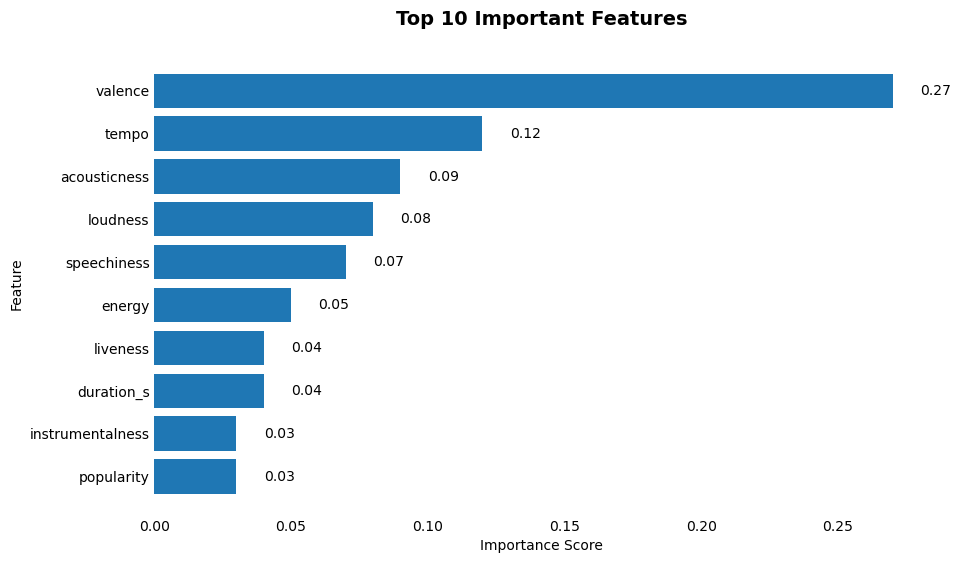

In [14]:
importances = rf_model.feature_importances_

top_n = 10
indices = importances.argsort()[::-1][:top_n]
top_importances = importances[indices]
top_feature_names = X_train.columns[indices]

rounded_importances = [round(importance, 2) for importance in top_importances]

plt.figure(figsize=(10, 6))
bars = plt.barh(range(top_n), rounded_importances, tick_label=top_feature_names)

for bar, importance in zip(bars, rounded_importances):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{importance}', ha='left', va='center')

plt.title('Top 10 Important Features', fontsize=14, fontweight='bold', pad=20)

plt.gca().invert_yaxis()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

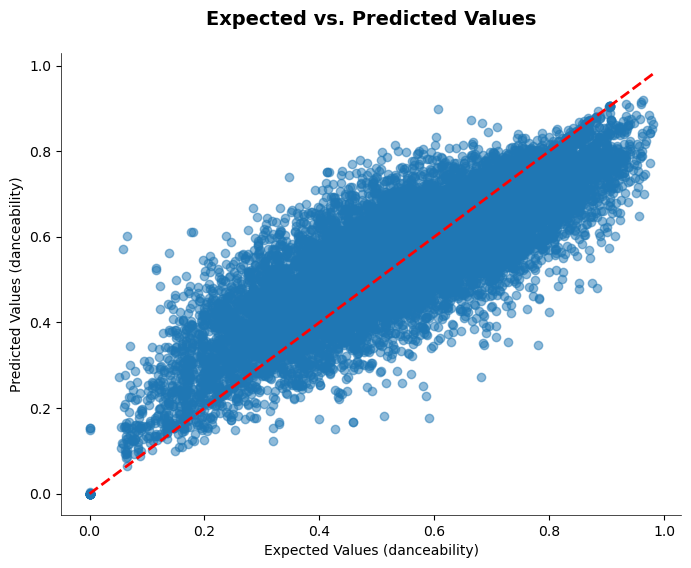

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title("Expected vs. Predicted Values", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Expected Values (danceability)")
plt.ylabel("Predicted Values (danceability)")
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [24]:
top_50 = pd.DataFrame({'track_id': test_ids, 'danceability_predicted': y_pred_rf})
top_50 = top_50.sort_values('danceability_predicted', ascending=False)
top_50 = top_50.head(50).reset_index(drop=True)

In [29]:
spotify_df = pd.read_csv('../data/raw/spotify.csv')

In [35]:
merged_df = pd.merge(top_50, spotify_df[['track_id', 'artists', 'album_name', 'track_name']], on='track_id', how='inner')
merged_df = merged_df.drop_duplicates().reset_index(drop=True)

In [36]:
merged_df

,track_id,danceability_predicted,artists,album_name,track_name,popularity
0,2mFJfExy0ZBZMH1mae2kFd,0.91898,Big Mucci,The Bikers Shuffle Collection,"Bikers Shuffle, Pt. 2",9
1,6cG4v6cDjjrlqooK2ey6Od,0.91574,CoComelon,Nursery Rhymes by CoComelon,Five Little Monkeys Jumping on the Bed,47
2,47bUyxG4UYJG2DKLdWrz2e,0.91014,CoComelon,Nursery Rhymes by CoComelon,This Is the Way,49
3,12og6h0QdwBAvh7wG7m3H4,0.90971,Pj Panda,My Favorite Rapper Is a Panda,The Potty Song,11
4,2YqN1h7IdAWI11t9tTZwXt,0.90564,Coach Kody,Get Active (Movement Songs For Kids),STRETCH 2,10
5,1KfwlyvJQD1TA70RyC0Byd,0.90500,Jack Harlow,Hit After Hit,First Class,0
6,6HIkxxaASDhaXdcMa2PFRB,0.90500,Jack Harlow,Am I Ready - Pop Night Out,First Class,0
7,1jBIlZyCUOylXmEuLNvGCQ,0.90500,Jack Harlow,Totally Rap,First Class,0
8,6q4IEBv1tWq3MHIBnCYYSS,0.90500,Jack Harlow,Hits Hits Hits,First Class,0
9,17TjJhR1wrGFW58aJnHpNC,0.90500,Jack Harlow,Your Perfect Soundtrack,First Class,0
